Cliente llegó en el tiempo 1, eligió la caja 1
Cliente llegó en el tiempo 5, eligió la caja 2
Cliente llegó en el tiempo 2, eligió la caja 3
Cliente llegó en el tiempo 4, eligió la caja 1
Cliente llegó en el tiempo 3, eligió la caja 1
Cliente llegó en el tiempo 0, eligió la caja 1
Cliente llegó en el tiempo 1, eligió la caja 1
Cliente llegó en el tiempo 1, eligió la caja 1
Cliente llegó en el tiempo 2, eligió la caja 1
Cliente llegó en el tiempo 4, eligió la caja 1
Cliente llegó en el tiempo 3, eligió la caja 1
Cliente llegó en el tiempo 7, eligió la caja 1
Cliente llegó en el tiempo 2, eligió la caja 3
Cliente llegó en el tiempo 4, eligió la caja 3
Cliente llegó en el tiempo 4, eligió la caja 3
Cliente llegó en el tiempo 6, eligió la caja 3
Cliente llegó en el tiempo 2, eligió la caja 3
Cliente llegó en el tiempo 2, eligió la caja 3
Cliente llegó en el tiempo 5, eligió la caja 3
Cliente llegó en el tiempo 2, eligió la caja 1
Cliente llegó en el tiempo 3, eligió la caja 1
Cliente llegó

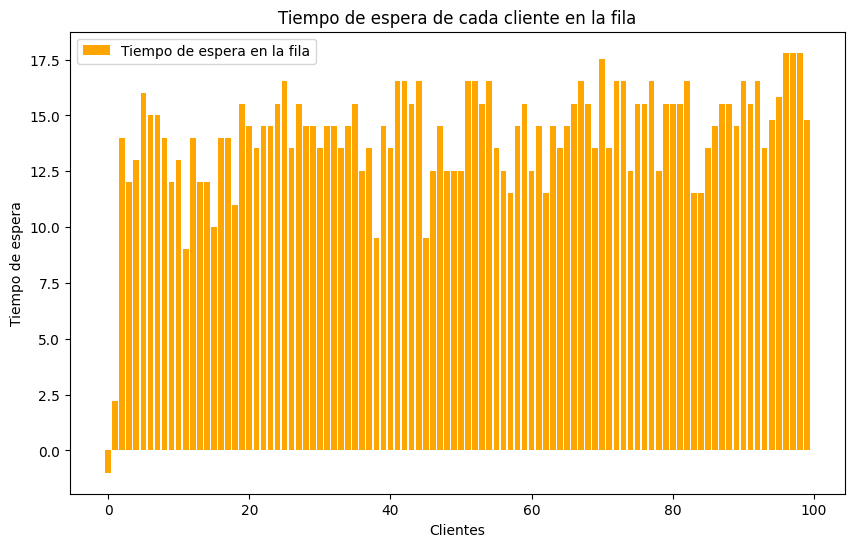

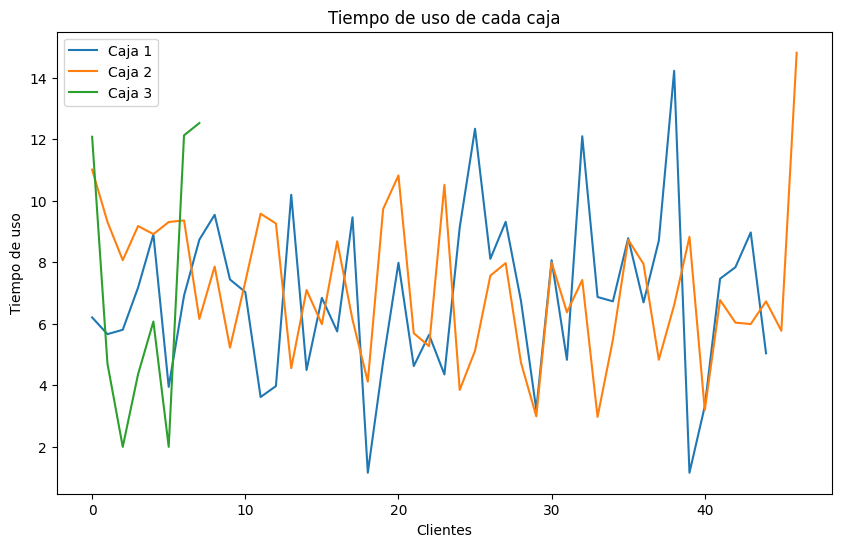

In [47]:
import numpy as np
import matplotlib.pyplot as plt

n = 100  # num usuarios
k = 3    # num cajas
mu1 = 3  # media de distribución de llegadas de clientes
mu2 = 5  # media de distribución de tiempo de uso en caja
sigma2 = 3  # desviacion est de distribución de tiempo de uso en caja
p = 0.4   # prob de pagar en efectivo

# genera llegadas de clientes (usando distribución de Poisson)
llegadas = np.random.poisson(mu1, n)

tiempo_uso_caja1 = []
tiempo_uso_caja2 = []
tiempo_uso_caja3 = []
tiempo_espera_fila = []
tiempo_libre_caja1 = []
tiempo_libre_caja2 = []
tiempo_libre_caja3 = []
cola_general = []
indices = np.arange(n)

for i, llegada in enumerate(llegadas):

    # tiempo de uso de la caja
    tiempo_uso_caja = [max(np.random.normal(mu2, sigma2), 0) for _ in range(k)]

    # elige la caja con el menor tiempo de espera en el momento de la llegada
    tiempo_espera_en_cajas = [tiempo_libre_caja1[-1] if tiempo_libre_caja1 else 0,
                               tiempo_libre_caja2[-1] if tiempo_libre_caja2 else 0,
                               tiempo_libre_caja3[-1] if tiempo_libre_caja3 else 0]

    caja_elegida = np.argmin(tiempo_espera_en_cajas)

    # medio de pago con bernoulli
    paga_en_efectivo = np.random.binomial(1, p)

    # calcula el tiempo de pago según el medio elegido
    # 2 minutos en efectivo, 70 seg en otro medio
    tiempo_pago = 2 if paga_en_efectivo else 1.16  

    # simula el tiempo de espera en la fila
    tiempo_espera = max(tiempo_espera_en_cajas) - llegada if tiempo_espera_en_cajas else 0

    # simula el tiempo de uso
    tiempo_uso = tiempo_uso_caja[caja_elegida] + tiempo_pago

    # actualiza las listas de tiempos
    if caja_elegida == 0:
        tiempo_uso_caja1.append(tiempo_uso)
        tiempo_libre_caja1.append(llegada + tiempo_uso)
    elif caja_elegida == 1:
        tiempo_uso_caja2.append(tiempo_uso)
        tiempo_libre_caja2.append(llegada + tiempo_uso)
    elif caja_elegida == 2:
        tiempo_uso_caja3.append(tiempo_uso)
        tiempo_libre_caja3.append(llegada + tiempo_uso)

    tiempo_espera_fila.append(tiempo_espera)

    cola_general.append({
        'llegada': llegada,
        'tiempo_espera': tiempo_espera,
        'tiempo_uso': tiempo_uso,
        'caja_elegida': caja_elegida + 1  # Suma 1 para hacer coincidir con el número de caja
    })


def graficoCajas():
    #indices = np.arange(len(tiempo_uso_caja1))

    #ancho_barra = 0.25
    indices = np.arange(len(tiempo_uso_caja1))  # Asegúrate de que 'indices' tiene la misma longitud que tus datos

    plt.figure(figsize=(10, 6))
    plt.plot(tiempo_uso_caja1, label='Caja 1')
    plt.plot(tiempo_uso_caja2, label='Caja 2')
    plt.plot(tiempo_uso_caja3, label='Caja 3')
    plt.title('Tiempo de uso de cada caja')
    plt.xlabel('Clientes')
    plt.ylabel('Tiempo de uso')
    plt.legend()
    plt.show()

def graficoEsperaClientes():
    plt.figure(figsize=(10, 6))
    plt.bar(indices, tiempo_espera_fila, color='orange', label='Tiempo de espera en la fila')
    plt.title('Tiempo de espera de cada cliente en la fila')
    plt.xlabel('Clientes')
    plt.ylabel('Tiempo de espera')
    plt.legend()
    plt.show()


for cliente in cola_general:
    print(f"Cliente llegó en el tiempo {cliente['llegada']}, eligió la caja {cliente['caja_elegida']}")
 
graficoEsperaClientes()
graficoCajas()